# Name : Samarth Deshpande
# Student ID : 8894058
# Course Name : CSCN8000 –Artificial Intelligence Algorithms and Mathematics
# Title : Midterm Part B: California Housing Prices Prediction

In [1]:
#Importing Libraries for data manupulation
import numpy as np
import pandas as pd

#Importing Data vislulisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

# Importing library for Using Z score and removing outliers
from scipy import stats
warnings.filterwarnings("ignore")

#Import Libraries for model traning
#for scaling data
from sklearn.preprocessing import StandardScaler
#for spliting data 
from sklearn.model_selection import train_test_split
#for linear regression model
from sklearn.linear_model import LinearRegression
#for evalution matrix of model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#for decision tree regressor
from sklearn.tree import DecisionTreeRegressor
#for random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Loading Data

In [2]:
df = pd.read_csv("housing_dataset.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN


In [3]:
#Using DF.info to check the datatype of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20629 non-null  float64
 3   total_rooms         20625 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20621 non-null  float64
 6   households          20626 non-null  float64
 7   median_income       20632 non-null  float64
 8   median_house_value  20560 non-null  float64
 9   ocean_proximity     20486 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#Using df.describe to understand the 5 summary statisctics of data  
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20629.000000,20625.000000,20433.000000,20621.000000,20626.000000,20632.000000,20560.000000
mean,-119.569704,35.631861,28.633380,2636.314812,537.870553,1425.785510,499.675555,3.871003,207334.239348
std,2.003532,2.135952,12.584167,2182.184573,421.385070,1132.799376,382.405161,1.899969,115352.171422
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.000000,280.000000,2.563400,120600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,410.000000,3.535250,180400.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743700,265225.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
#Checking for na values in dataset
df.isna().sum()

longitude               0
latitude                0
housing_median_age     11
total_rooms            15
total_bedrooms        207
population             19
households             14
median_income           8
median_house_value     80
ocean_proximity       154
dtype: int64

In [6]:
#Checking the count of uniques of only categorical feature that we have 
df['ocean_proximity'].value_counts()
#Here we can see that their is inconsistancy present for example : Near_by and Near Bay 
#We will treat this inconsistancy in futher code

<1H OCEAN     9058
INLAND        6490
NEAR OCEAN    2647
NEAR BAY      2239
NEAR_bay        32
inland          15
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#Checking the shape of the data i.e we have 20640 rows and 10 columns present till now
df.shape

(20640, 10)

# Investigate the existence of errors/inconsistencies in the fields and solve them

In [8]:
# As discussied above here first we have converted the values of ocean proximity column in capital string 
#Then have replace the wrong values with correct name
#After checking the count again we can only find 3 unique values for ocean proximity column

df['ocean_proximity'] = df['ocean_proximity'].str.upper()
df['ocean_proximity'].replace({'NEAR BAY': 'NEAR_BAY', 'ISLAND': 'INLAND','<1H OCEAN' :'NEAR_OCEAN', 'NEAR OCEAN':'NEAR_OCEAN' }, inplace=True)
df['ocean_proximity'].value_counts()

NEAR_OCEAN    11705
INLAND         6510
NEAR_BAY       2271
Name: ocean_proximity, dtype: int64

<AxesSubplot: >

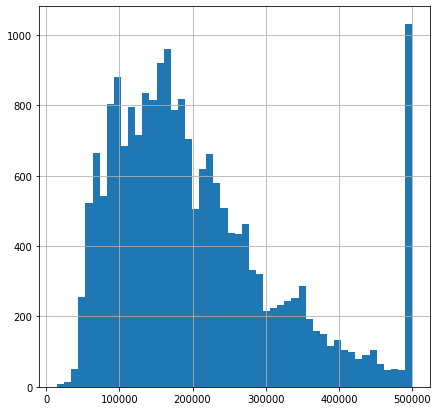

In [9]:
#Here we are checking the distribution of meadian house value which is our target variable and here we can find out that data is not distributed well and has outliers present
df['median_house_value'].hist(bins=50, figsize = (7,7))

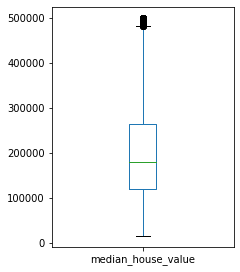

In [10]:
#One more way to check outliers is by using box plot
df['median_house_value'].plot(kind = "box" , subplots = True , figsize = (15,15) ,  layout = (3,4))
plt.show()

# Detect and handle outliers for the “median_house_value” field using:
a. Apply the whiskers approach to identify outlier rows

In [11]:
#Now are removing the outliers from median house value column by using IQR (Inter Quartile Range)

#Here we are calculating the IQR
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

#We are defining the lower and upper bound 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Now we are removing the outliers and are keeping the values which are greater then lower bound and smaller then upper bound
outliers = (df['median_house_value'] < lower_bound) | (df['median_house_value']> upper_bound)
df_no_outliers = df[~outliers]

In [12]:
IQR

144625.0

In [13]:
lower_bound

-96337.5

In [14]:
upper_bound

482162.5

In [15]:
df_no_outliers.shape

(19568, 10)

<AxesSubplot: >

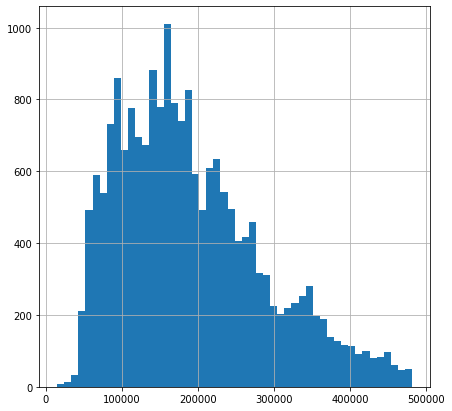

In [16]:
#After removing the outlier here we have again used the histogram plot to check whether outoutliers are removed or not
df_no_outliers["median_house_value"].hist(bins=50, figsize = (7,7))
#After visualising we can observe that outliers had been remove by comparing the plot with previous one

# b. (Optional) Apply Z-score normalization and choose appropriate threshold to match the outliers from the whiskers approach 

In [17]:
#Here we have used Z Score normalization technique and for that first we have calculated mean and 
#standard deviation for calculating Zscore 

# Z-score
mean = df['median_house_value'].mean()
std = df['median_house_value'].std()
df['z_score'] = (df['median_house_value'] - mean) / std

#We have used threshold as 1.5

threshold = 1.5

#Here we can find out that their are 2017 outliers 
outliers = df[df['z_score'] > threshold]
print("no. of outliers: ",len(outliers))
outliers.head()

no. of outliers:  2017


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,z_score
18623,-118.40,34.15,41.0,2394.0,500.0,837.0,417.0,4.3889,380400.0,NEAR_OCEAN,1.500325
18624,-118.32,34.08,52.0,1164.0,257.0,575.0,251.0,3.1250,380400.0,NEAR_OCEAN,1.500325
18625,-118.24,34.16,52.0,1904.0,297.0,797.0,286.0,6.6603,380400.0,NEAR_OCEAN,1.500325
18626,-122.44,37.75,52.0,1573.0,334.0,725.0,338.0,5.0505,380400.0,NEAR_BAY,1.500325
18627,-119.23,34.15,18.0,6213.0,1188.0,2679.0,1000.0,3.7480,380400.0,NEAR_OCEAN,1.500325


In [18]:
#Here we can find out that their are 2017 outliers 
new_df = df[df['z_score'] < threshold]

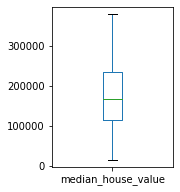

In [19]:
new_df['median_house_value'].plot(kind = "box" , subplots = True , figsize = (10,10) ,  layout = (3,4))
plt.show()

# Handle missing values in the dataset:
# a. For numerical features:
# i. Choose whether mean/median is better to impute the values
# ii. (Optional) look for other ways to impute based on other categorical variables (1 bonus point)
# b. For categorical features: Choose the appropriate imputation method

In [20]:
#Finding out the missing values 
new_df.isna().sum()

longitude               0
latitude                0
housing_median_age      3
total_rooms            11
total_bedrooms        188
population             10
households             14
median_income           4
median_house_value      0
ocean_proximity       147
z_score                 0
dtype: int64

In [21]:
# Here we have imputed the numerical missing values by median and to increase the efficency I imputed the values by calculating median of each value data type of ocean_proximity   
# Imputed categorical data by mode that is highest occuring value but I belive that it will increase the bias of data.
#I have used median because it is not affected by outliers

categorical_columns = ["ocean_proximity"]
numerical_columns = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]


# Impute missing values for categorical columns with mode
for column in categorical_columns:
    mode_value = new_df[column].mode()[0]
    new_df[column].fillna(mode_value, inplace=True)

# Impute missing values for numerical columns with median
for column in numerical_columns:
    median_value =new_df.groupby('ocean_proximity')[column].transform('median')
    new_df[column].fillna(median_value, inplace=True)

In [22]:
#Again checking for na values but their are none
new_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
z_score               0
dtype: int64

# Engineer one new feature based on existing features.

In [23]:
#Here we have created a new feature called bedroom_ratio which will tell us that outof total rooms how many are bedrooms
new_df['bedrooms_ratio'] = new_df['total_bedrooms'] / new_df['total_rooms']

In [24]:
new_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,z_score,bedrooms_ratio
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND,-1.667374,0.286275
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND,-1.667374,0.386107
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND,-1.667374,0.332503
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND,-1.667374,0.285714
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,NEAR_OCEAN,-1.645693,0.340771
...,...,...,...,...,...,...,...,...,...,...,...,...
18618,-121.34,38.59,22.0,3273.0,480.0,1151.0,463.0,8.0500,380000.0,INLAND,1.496857,0.146654
18619,-122.41,37.79,52.0,3598.0,1011.0,2062.0,966.0,2.9871,380000.0,NEAR_BAY,1.496857,0.280989
18620,-120.66,35.20,13.0,5138.0,713.0,1838.0,645.0,5.9676,380000.0,NEAR_OCEAN,1.496857,0.138770
18621,-118.24,34.24,31.0,3812.0,595.0,1645.0,591.0,7.5850,380100.0,NEAR_OCEAN,1.497724,0.156086


# Investigate the distribution of housing prices across different ocean proximities in California

Here we can see observe that the prices for houses near bay are costly whereas houses in inland are cheeper.

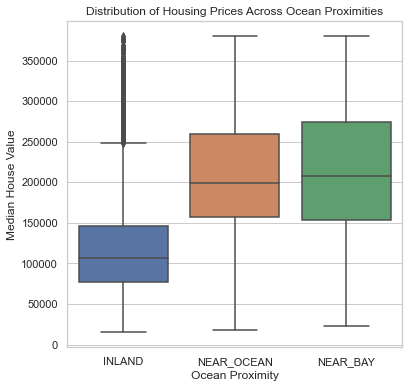

In [50]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=new_df)
plt.title('Distribution of Housing Prices Across Ocean Proximities')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

# Analyze the relationship between median income and housing prices

Here we can see a linear and positive relationship between median income and housing prices and is 64% corelated

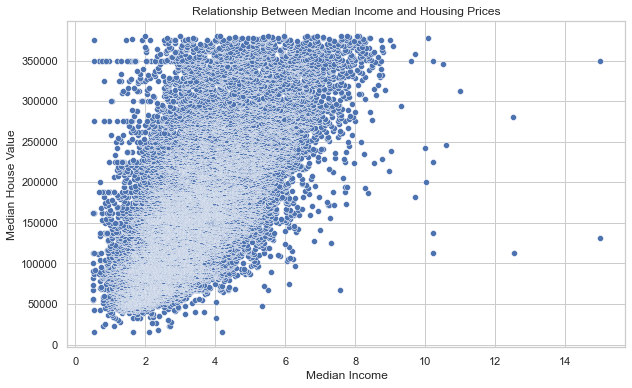

Correlation Coefficient: 0.6429201931476213


In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=new_df)
plt.title('Relationship Between Median Income and Housing Prices')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Calculated correlation coefficient to check the correlation
correlation_coef = df_no_outliers['median_income'].corr(df_no_outliers['median_house_value'])
print(f'Correlation Coefficient: {correlation_coef}')

# Encode categorical variables using using appropriate method based on feature characteristics.

Here we have used pd.getdummies to encoded the categorical variable. As there are more then 2 values so we have not used onehot encoding to avoid ordinal behaviour of data.

In [27]:
df_encoded = pd.get_dummies(new_df, columns=['ocean_proximity'], prefix='ocean_proximity')

Here we can see that 3 new columns are added

In [28]:
df_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,z_score,bedrooms_ratio,ocean_proximity_INLAND,ocean_proximity_NEAR_BAY,ocean_proximity_NEAR_OCEAN
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,-1.667374,0.286275,1,0,0
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,-1.667374,0.386107,1,0,0
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,-1.667374,0.332503,1,0,0
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,-1.667374,0.285714,1,0,0
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,-1.645693,0.340771,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18618,-121.34,38.59,22.0,3273.0,480.0,1151.0,463.0,8.0500,380000.0,1.496857,0.146654,1,0,0
18619,-122.41,37.79,52.0,3598.0,1011.0,2062.0,966.0,2.9871,380000.0,1.496857,0.280989,0,1,0
18620,-120.66,35.20,13.0,5138.0,713.0,1838.0,645.0,5.9676,380000.0,1.496857,0.138770,0,0,1
18621,-118.24,34.24,31.0,3812.0,595.0,1645.0,591.0,7.5850,380100.0,1.497724,0.156086,0,0,1


In [29]:
print(df_encoded.dtypes)

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
z_score                       float64
bedrooms_ratio                float64
ocean_proximity_INLAND          uint8
ocean_proximity_NEAR_BAY        uint8
ocean_proximity_NEAR_OCEAN      uint8
dtype: object


In [30]:
print(df_encoded.isnull().sum())

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
z_score                       0
bedrooms_ratio                0
ocean_proximity_INLAND        0
ocean_proximity_NEAR_BAY      0
ocean_proximity_NEAR_OCEAN    0
dtype: int64


In [31]:
df_encoded.drop_duplicates(inplace=True)

In [32]:
## Standardization allows to preserve the original distribution of the data. It scales the data such that the mean is 0 and standard deviation is 1.
## Standardization ensures that all features are on the same scale.Features measured in different units or with different ranges can be effectively compared after standardization. 
## Standardization removes the units and makes the values comparable on a standardized scale.

# Standardization

In [33]:
numerical_columns = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value", "bedrooms_ratio"]

# Select numerical columns and apply StandardScaler
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [34]:
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,z_score,bedrooms_ratio,ocean_proximity_INLAND,ocean_proximity_NEAR_BAY,ocean_proximity_NEAR_OCEAN
0,-1.602441,1.877361,-0.977941,-1.075241,-1.098968,-1.183593,-1.199859,-1.312755,-2.019059,-1.667374,1.069549,1,0,0
1,1.259619,0.344358,-0.736598,-0.908412,-0.707279,-0.833004,-0.873355,-1.009518,-2.019059,-1.667374,2.614797,1,0,0
2,0.839316,-0.656030,1.918177,-0.824081,-0.641211,-0.713544,-0.715285,0.435361,-2.019059,-1.667374,1.785097,1,0,0
3,-1.817596,2.155247,0.631013,-1.147197,-1.205148,-1.241592,-1.277598,-2.089105,-2.019059,-1.667374,1.060878,1,0,0
4,0.604147,-0.697713,0.872357,-0.966160,-0.874809,-1.032969,-0.940729,-0.825423,-1.988354,-1.645693,1.913068,0,0,1


# Splitting the data into independent and dependent set

In [35]:
X = df_encoded.drop("median_house_value", axis=1) 
y = df_encoded["median_house_value"]

In [36]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,z_score,bedrooms_ratio,ocean_proximity_INLAND,ocean_proximity_NEAR_BAY,ocean_proximity_NEAR_OCEAN
0,-1.602441,1.877361,-0.977941,-1.075241,-1.098968,-1.183593,-1.199859,-1.312755,-1.667374,1.069549,1,0,0
1,1.259619,0.344358,-0.736598,-0.908412,-0.707279,-0.833004,-0.873355,-1.009518,-1.667374,2.614797,1,0,0
2,0.839316,-0.656030,1.918177,-0.824081,-0.641211,-0.713544,-0.715285,0.435361,-1.667374,1.785097,1,0,0
3,-1.817596,2.155247,0.631013,-1.147197,-1.205148,-1.241592,-1.277598,-2.089105,-1.667374,1.060878,1,0,0
4,0.604147,-0.697713,0.872357,-0.966160,-0.874809,-1.032969,-0.940729,-0.825423,-1.645693,1.913068,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18618,-0.901937,1.358641,-0.495255,0.307970,-0.138623,-0.260807,-0.098554,3.097605,1.496857,-1.091555,1,0,0
18619,-1.437322,0.988127,1.918177,0.456925,1.114308,0.527802,1.204872,-0.397177,1.496857,0.987744,0,1,0
18620,-0.561692,-0.211413,-1.219285,1.162738,0.411157,0.333896,0.373063,1.660181,1.496857,-1.213595,0,0,1
18621,0.649179,-0.656030,0.228775,0.555005,0.132727,0.166825,0.233133,2.776628,1.497724,-0.945569,0,0,1


In [37]:
y

0       -2.019059
1       -2.019059
2       -2.019059
3       -2.019059
4       -1.988354
           ...   
18618    2.462055
18619    2.462055
18620    2.462055
18621    2.463283
18622    2.465738
Name: median_house_value, Length: 18543, dtype: float64

# Train test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [39]:
model = LinearRegression()

# Fitting linear regression model

In [40]:
model.fit(X_train, y_train)

LinearRegression()

# Making predictions on the test set

In [41]:
y_pred = model.predict(X_test)

# Evaluating the model using MSE, MAE, and R2

In [42]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
coefficients = model.coef_
feature_names = X.columns

In [44]:
# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Print the coefficients
print(coefficients_df)

# Identify the feature with the highest weight
highest_weight_feature = coefficients_df.loc[coefficients_df['Coefficient'].idxmax(), 'Feature']
print(f"The feature with the highest weight is: {highest_weight_feature}")

                       Feature   Coefficient
0                    longitude -1.053869e-15
1                     latitude -6.661338e-16
2           housing_median_age  1.016919e-15
3                  total_rooms -6.564375e-16
4               total_bedrooms  1.014753e-15
5                   population  1.648516e-16
6                   households  1.924604e-16
7                median_income  8.420960e-16
8                      z_score  1.416178e+00
9               bedrooms_ratio  2.705057e-16
10      ocean_proximity_INLAND -5.152718e-16
11    ocean_proximity_NEAR_BAY  2.978197e-16
12  ocean_proximity_NEAR_OCEAN  4.423303e-16
The feature with the highest weight is: z_score


# Decision Tree Regressor

In [45]:
# Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [46]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42) 
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

## Model evaluation using mae, mse and r2

In [47]:
# Evaluate performance
def evaluate_performance(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R2: {r2}")
    print("\n")
    
evaluate_performance(y_test, y_pred, "Simple Linear regression")
evaluate_performance(y_test, y_pred_tree, "Decision Tree Regressor")
evaluate_performance(y_test, y_pred_forest, "Random Forest Regressor")

Simple Linear regression Metrics:
MSE: 2.523478214645613e-30
MAE: 1.2758340441384244e-15
R2: 1.0


Decision Tree Regressor Metrics:
MSE: 6.392279001740176e-07
MAE: 0.0001969482149295416
R2: 0.9999993503317178


Random Forest Regressor Metrics:
MSE: 5.58868199434553e-07
MAE: 0.00017450594928819944
R2: 0.9999994320039175




Simple Linear Regression:

Very low MSE (mean squared error), close to zero, indicates that the model fits the data extremely well.
Extremely low MAE (mean absolute error) suggests very accurate predictions.
R2 score of 1.0 indicates a perfect fit, meaning the model explains all the variance in the data.


Decision Tree Regressor


A low MSE and MAE, though slightly higher than the linear regression, indicate good performance.
The R2 score close to 1 suggests that the model explains most of the variance in the data but might have a slight overfitting issue.


Random Forest Regressor:

Similar to the Decision Tree, this model has low MSE and MAE, indicating good predictive accuracy.
The R2 score is also close to 1, showing a strong ability to explain the variance in the data.
In summary, all three models perform exceptionally well with very low error metrics and high R2 scores. However, the Simple Linear Regression model seems to have the best performance with the lowest errors and a perfect R2 score, though it might be overfitting. The Decision Tree and Random Forest models are also highly accurate but may have a slight overfitting concern.